<a href="https://colab.research.google.com/github/thabied/Heart-Failure/blob/master/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAD PACKAGES**

In [ ]:
!pip install pycaret

In [ ]:
!pip install seaborn==0.11.0

In [ ]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode activated.


In [ ]:
from google.colab import drive
drive.mount('/content//drive')

Drive already mounted at /content//drive; to attempt to forcibly remount, call drive.mount("/content//drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Deployment Models/Heart Failure/heart_failure_clinical_records_dataset.csv')

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.shape

(299, 13)

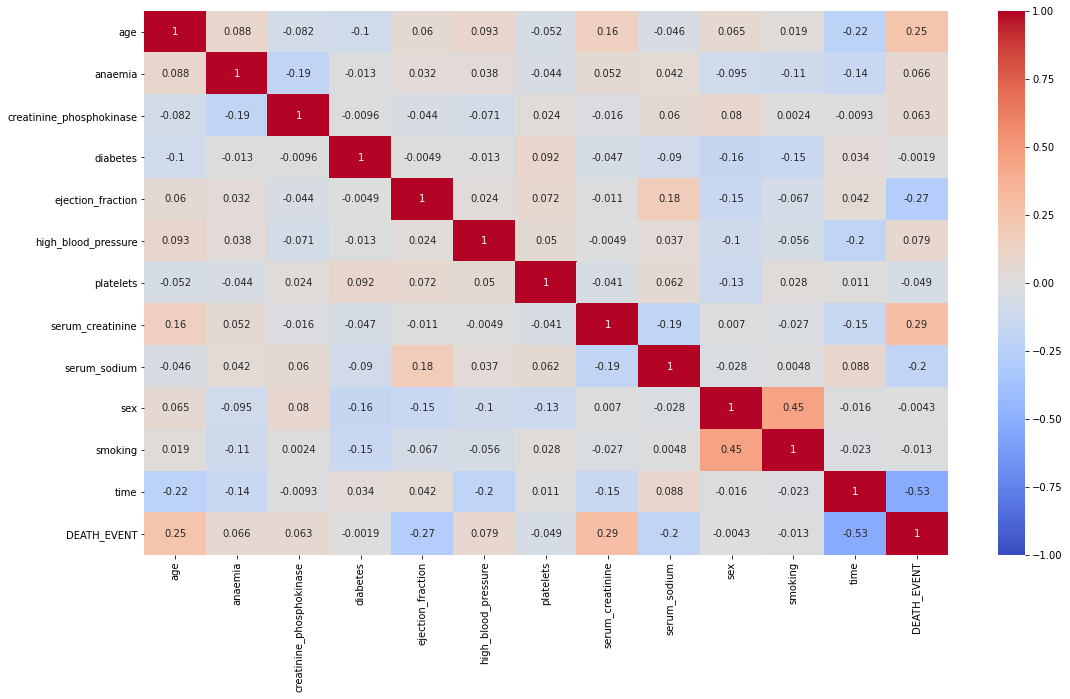

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [ ]:
deaths = len(df[df['DEATH_EVENT'] == 1])/len(df)
survivors = len(df[df['DEATH_EVENT'] == 0])/len(df)

print('% death class: ',round(deaths,2))
print('% survived class: ',round(survivors,2))

% death class:  0.32
% survived class:  0.68


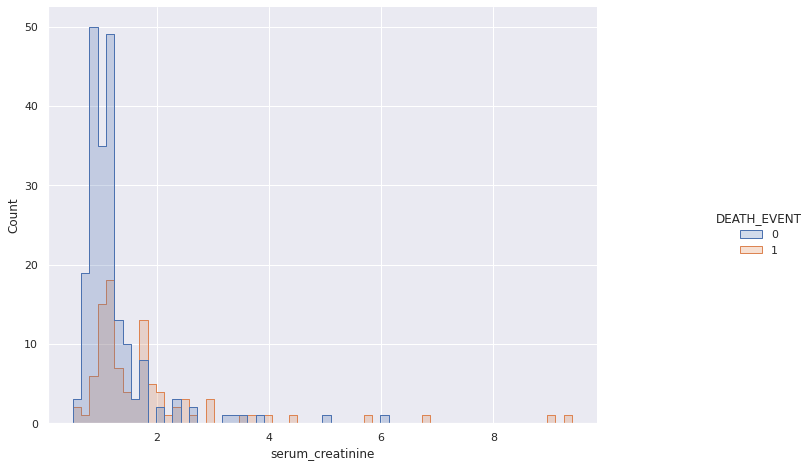

In [ ]:
g = sns.displot(df, x="serum_creatinine", hue="DEATH_EVENT", element="step")
g.fig.set_size_inches(12,7)

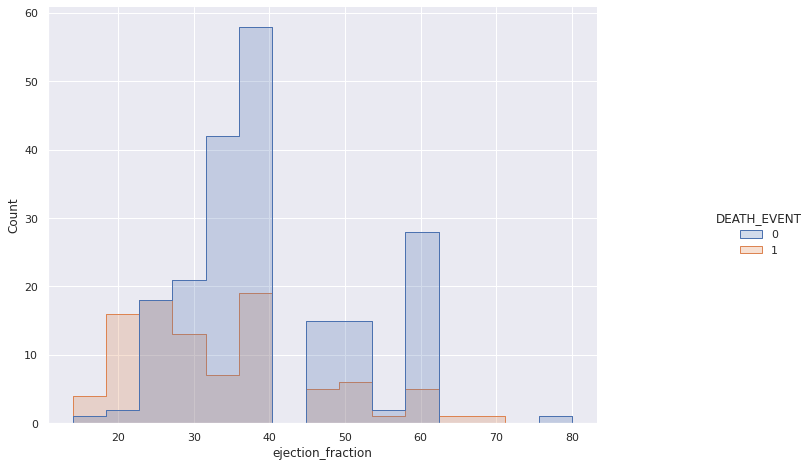

In [ ]:
g = sns.displot(df, x="ejection_fraction", hue="DEATH_EVENT", element="step")
g.fig.set_size_inches(12,7)

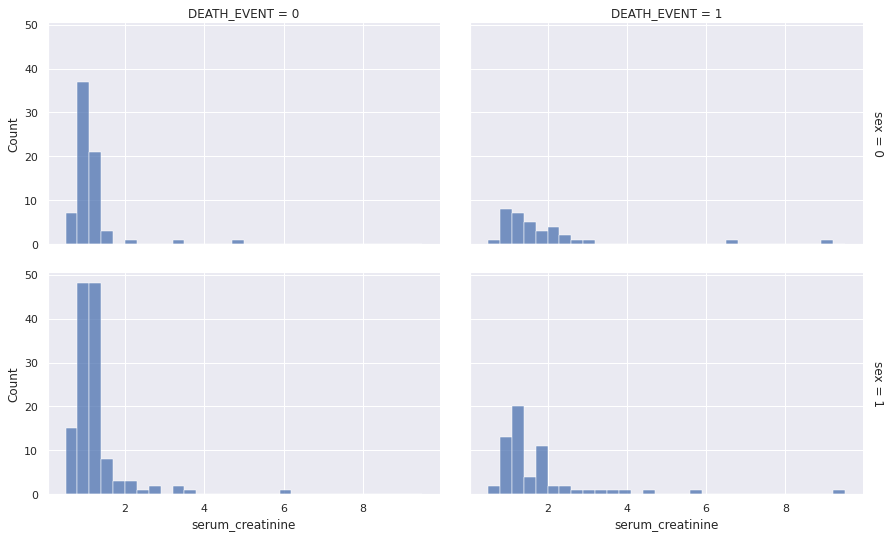

In [ ]:
sns.set_theme(style="darkgrid")

g = sns.displot(
    df, x="serum_creatinine", col="DEATH_EVENT", row="sex",
    binwidth=0.3, height=3, facet_kws=dict(margin_titles=True))

g.fig.set_size_inches(14,8)

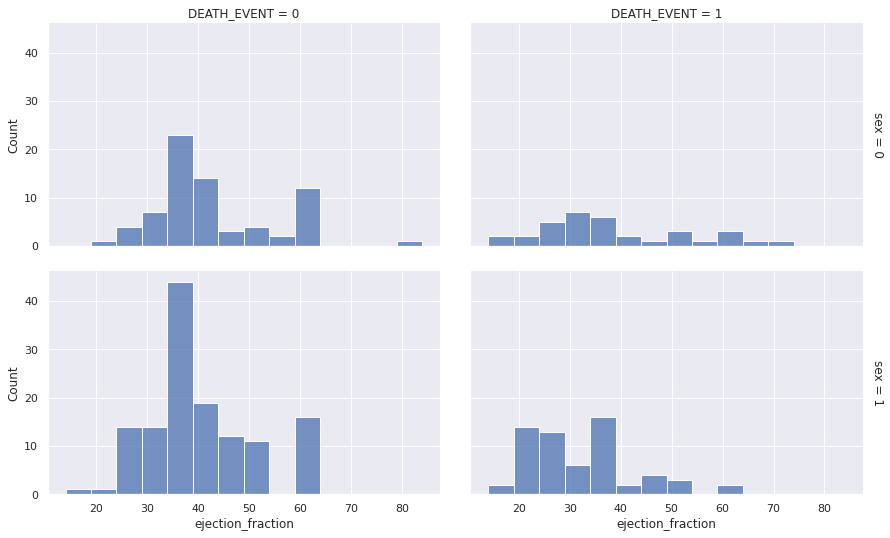

In [ ]:
sns.set_theme(style="darkgrid")

g = sns.displot(
    df, x="ejection_fraction", col="DEATH_EVENT", row="sex",
    binwidth=5, height=3, facet_kws=dict(margin_titles=True))

g.fig.set_size_inches(14,8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


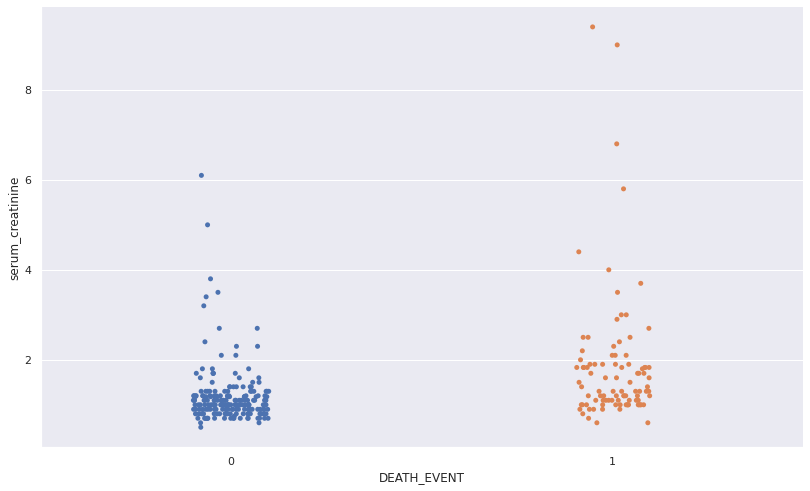

In [ ]:
g = sns.catplot(x="DEATH_EVENT", y="serum_creatinine", data=df,ax=(12,8))
g.fig.set_size_inches(12,7)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


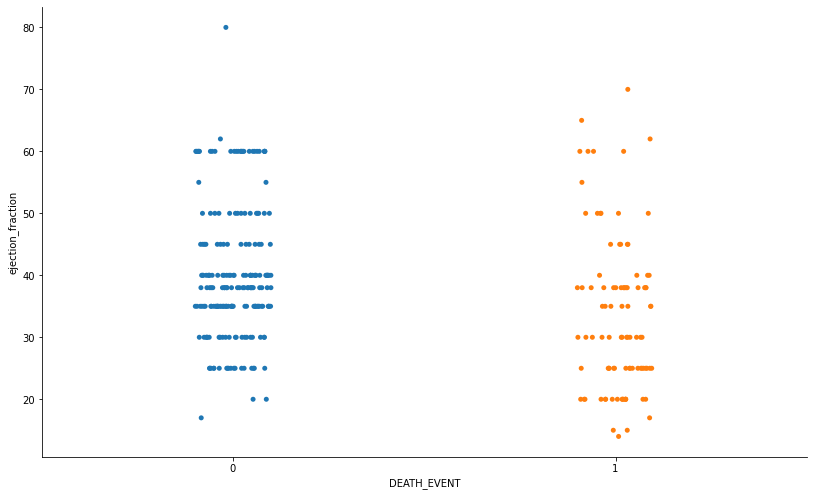

In [ ]:
g = sns.catplot(x="DEATH_EVENT", y="ejection_fraction", data=df,ax=(12,8))
g.fig.set_size_inches(12,7)

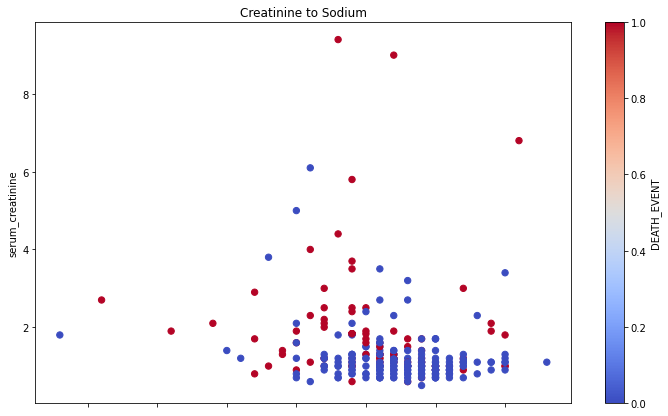

In [ ]:
df.plot.scatter(x='serum_sodium', y='serum_creatinine', c='DEATH_EVENT', colormap='coolwarm',s=40 ,figsize=(12,7), title='Creatinine to Sodium')

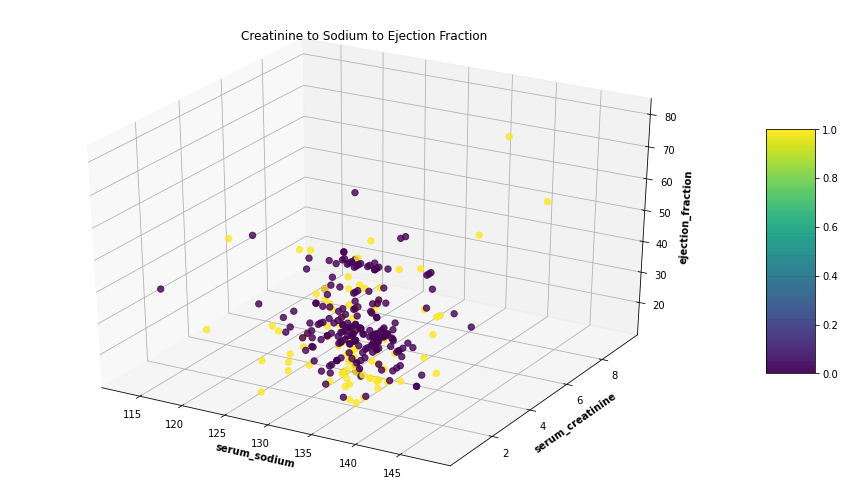

In [ ]:
# Creating figure 
fig = plt.figure(figsize = (16, 9)) 
ax = plt.axes(projection ="3d")

# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  
  
# Creating plot 
sctt = ax.scatter3D(df['serum_sodium'], df['serum_creatinine'], df['ejection_fraction'], 
                    alpha = 0.8, 
                    c = df['DEATH_EVENT'],
                    s = 40) 
  
plt.title('Creatinine to Sodium to Ejection Fraction') 
ax.set_xlabel('serum_sodium', fontweight ='bold')  
ax.set_ylabel('serum_creatinine', fontweight ='bold')  
ax.set_zlabel('ejection_fraction', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
  
# show plot 
plt.show() 

# **MODEL TRAINING WITH PYCARET**

In [ ]:
dfnew = df[['age','ejection_fraction','serum_creatinine','DEATH_EVENT']]

In [ ]:
experiment1 = setup(data = dfnew, target = 'DEATH_EVENT', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  numeric_features=['ejection_fraction'],
                  bin_numeric_features = ['age'],
                  log_experiment = True, experiment_name = 'heart_failure1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(299, 4)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7562,0.7965,0.5286,0.6819,0.5775,0.4136,0.4313,0.5523
1,Linear Discriminant Analysis,0.7512,0.7898,0.4500,0.6588,0.5245,0.3708,0.3857,0.0056
2,Ridge Classifier,0.7467,0.0000,0.4214,0.6567,0.5053,0.3524,0.3692,0.0057
3,Logistic Regression,0.7421,0.7781,0.3905,0.6667,0.4865,0.3338,0.3560,0.0129
4,K Neighbors Classifier,0.7421,0.7707,0.5000,0.6425,0.5431,0.3721,0.3903,0.0038
5,Ada Boost Classifier,0.7410,0.7505,0.4810,0.6763,0.5442,0.3731,0.3946,0.0786
6,Extreme Gradient Boosting,0.7369,0.7824,0.4690,0.6474,0.5171,0.3508,0.3741,0.0216
7,Extra Trees Classifier,0.7226,0.7575,0.4643,0.6085,0.5090,0.3261,0.3399,0.2493
8,SVM - Linear Kernel,0.7129,0.0000,0.5119,0.5669,0.4968,0.3148,0.3361,0.0055
9,Gradient Boosting Classifier,0.7124,0.7498,0.4833,0.5850,0.5167,0.3180,0.3290,0.0644


In [ ]:
model = create_model('catboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.8037,0.6154,0.6667,0.6400,0.4878,0.4886
1,0.6905,0.7931,0.3077,0.5000,0.3810,0.1899,0.1999
2,0.7143,0.8737,0.2857,0.6667,0.4000,0.2500,0.2887
3,0.7143,0.7398,0.5714,0.5714,0.5714,0.3571,0.3571
4,0.6829,0.7995,0.3077,0.5000,0.3810,0.1838,0.1936
Mean,0.7175,0.8020,0.4176,0.5810,0.4747,0.2937,0.3056
SD,0.0363,0.0427,0.1445,0.0747,0.1094,0.1153,0.1097


In [ ]:
tuned_model = tune_model(model, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.8667,0.6667,0.5714,0.6154,0.4444,0.4472
1,0.8095,0.7444,0.5000,0.7500,0.6000,0.4815,0.4985
2,0.7143,0.8673,0.2857,0.6667,0.4000,0.2500,0.2887
3,0.6190,0.7041,0.2857,0.4000,0.3333,0.0769,0.0791
4,0.7143,0.8776,0.2857,0.6667,0.4000,0.2500,0.2887
5,0.7143,0.8929,0.2857,0.6667,0.4000,0.2500,0.2887
6,0.5714,0.5918,0.4286,0.3750,0.4000,0.0690,0.0693
7,0.7619,0.8163,0.4286,0.7500,0.5455,0.4000,0.4287
8,0.7619,0.8367,0.4286,0.7500,0.5455,0.4000,0.4287
9,0.7000,0.7619,0.3333,0.5000,0.4000,0.2105,0.2182


In [ ]:
save_model(model, '/content/drive/My Drive/Deployment Models/Heart Failure/model_new')

Transformation Pipeline and Model Succesfully Saved
